# Task

1) Using the terrorism dataset, build a neural network binary classifier.
2) Present and explain the following metrics: accuracy, precision, recall, F1, confusion matrix
3) Adjust the parameters of your model, does the result change? Explain the changes you have made.

## Task 1.

In [66]:
#Surpress project warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
# Load the dataset
df = pd.read_csv('terror_data.csv')
# Display the first few rows to understand the data
print(df.head())

      ID  Act of terror Sex EthnicAppearance_cleaned  Age InitialRisk  \
0  12202              0   M           Afro-Caribbean   17           H   
1  12376              1   M           Afro-Caribbean   20           S   
2  12567              0   M           Afro-Caribbean   21           S   
3  12222              0   M           Afro-Caribbean   22           M   
4  12480              0   M                     Arab   23           S   

   Crimes in pre  Terror in Pre  Number of prior co-offenders  
0              1              0                             2  
1              2              0                             5  
2              1              0                             1  
3              1              0                             4  
4              2              0                             2  


In [69]:
# Recode object columns into numerical values
df['Sex'].replace(('M', 'F'), (0, 1), inplace=True)
df['EthnicAppearance_cleaned'].replace(('Afro-Caribbean', 'Arab', 'Asian', 'Black',
       'Chinese, Japanese or SE Asian', 'Middle Eastern',
       'North European - White', 'South European - White', 'Unknown',
       'White European'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), inplace=True)
df['InitialRisk'].replace(('H', 'S', 'M', 'Unknown'), (0, 1, 2, 3), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   ID                            2008 non-null   int64
 1   Act of terror                 2008 non-null   int64
 2   Sex                           2008 non-null   int64
 3   EthnicAppearance_cleaned      2008 non-null   int64
 4   Age                           2008 non-null   int64
 5   InitialRisk                   2008 non-null   int64
 6   Crimes in pre                 2008 non-null   int64
 7   Terror in Pre                 2008 non-null   int64
 8   Number of prior co-offenders  2008 non-null   int64
dtypes: int64(9)
memory usage: 141.3 KB


In [70]:
# recode numberic columns
df['Age'] = pd.to_numeric(df['Age'],downcast="float")
df['Crimes in pre'] = pd.to_numeric(df['Age'],downcast="float")
df['Terror in Pre'] = pd.to_numeric(df['Age'],downcast="float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2008 non-null   int64  
 1   Act of terror                 2008 non-null   int64  
 2   Sex                           2008 non-null   int64  
 3   EthnicAppearance_cleaned      2008 non-null   int64  
 4   Age                           2008 non-null   float32
 5   InitialRisk                   2008 non-null   int64  
 6   Crimes in pre                 2008 non-null   float32
 7   Terror in Pre                 2008 non-null   float32
 8   Number of prior co-offenders  2008 non-null   int64  
dtypes: float32(3), int64(6)
memory usage: 117.8 KB


In [71]:
# Define the features (X) and the target (y)
X = df.drop(columns=['ID', 'Act of terror'])  # Dropping the ID and target columns
y = df['Act of terror']  # The target variable

In [72]:
#show the training data
X

,Sex,EthnicAppearance_cleaned,Age,InitialRisk,Crimes in pre,Terror in Pre,Number of prior co-offenders
0,0,0,17.0,0,17.0,17.0,2
1,0,0,20.0,1,20.0,20.0,5
2,0,0,21.0,1,21.0,21.0,1
3,0,0,22.0,2,22.0,22.0,4
4,0,1,23.0,1,23.0,23.0,2
...,...,...,...,...,...,...,...
2003,1,6,47.0,1,47.0,47.0,0
2004,0,6,47.0,1,47.0,47.0,0
2005,1,6,47.0,1,47.0,47.0,0
2006,0,6,47.0,1,47.0,47.0,0


In [73]:
# show the data we want to predict
y

0       0
1       1
2       0
3       0
4       0
       ..
2003    1
2004    1
2005    0
2006    1
2007    0
Name: Act of terror, Length: 2008, dtype: int64

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Creating the neural network

# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(512, activation='relu', input_dim=7))

# Additional hidden layer
model.add(Dense(512, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5018 - loss: 1.8125 - val_accuracy: 0.4925 - val_loss: 0.9423
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4942 - loss: 0.8172 - val_accuracy: 0.5299 - val_loss: 0.6891
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5091 - loss: 0.7037 - val_accuracy: 0.4925 - val_loss: 0.8217
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5322 - loss: 0.7449 - val_accuracy: 0.4925 - val_loss: 0.7388
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5361 - loss: 0.7136 - val_accuracy: 0.4925 - val_loss: 0.8984
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 0.8243 - val_accuracy: 0.5050 - val_loss: 0.6930
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5448 - loss: 0.7114 - val_accuracy: 0.5448 - val_loss: 0.6893
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5130 - loss: 0.7125 - val_accuracy: 0.5075 - v

## Task 2.

In [95]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [96]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred) # Measures the overall proportion of correct predictions out of all predictions made.
precision = precision_score(y_test, y_pred) # Measures the proportion of positive predictions that are actually correct.
recall = recall_score(y_test, y_pred) # Measures the proportion of actual positives that were correctly identified by the model.
f1 = f1_score(y_test, y_pred) # Provides a balanced measure of precision and recall by computing their harmonic mean.
conf_matrix = confusion_matrix(y_test, y_pred) # Provides an overview of the rate of TPs, TNs, FPs, FNs.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [97]:
# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 55.47%
Precision: 0.59
Recall: 0.30
F1 Score: 0.40


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step


Text(0.5, 1.0, 'Confusion Matrix')

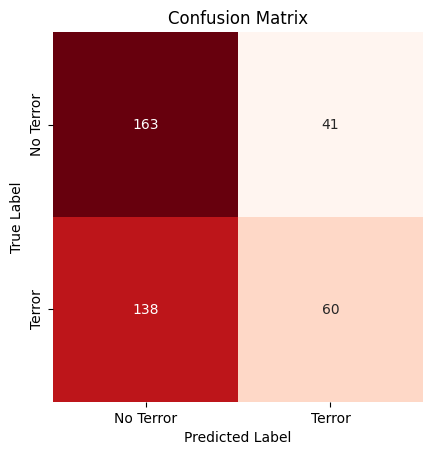

In [98]:
# Display confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_predicted = model.predict(X_test) > 0.5

# Create confusion matrix
mat = confusion_matrix(y_test, y_predicted)

# Define labels
labels = ["No Terror", "Terror"]

# Plot confusion matrix using seaborn
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='Reds', 
            xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot

## Task 3.

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer and first hidden layer - reduced number of neurons
model.add(Dense(256, activation='relu', input_dim=7))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting

# Second hidden layer - increased number of neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting

# Third hidden layer - increased number of neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate if needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,265 (169.00 KB)

 Trainable params: 43,265 (169.00 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
from keras.callbacks import EarlyStopping

# Early stopping to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5028 - loss: 2.3033 - val_accuracy: 0.4900 - val_loss: 0.6938
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5013 - loss: 1.0334 - val_accuracy: 0.5075 - val_loss: 0.6924
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5130 - loss: 0.8562 - val_accuracy: 0.5075 - val_loss: 0.6924
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5280 - loss: 0.7698 - val_accuracy: 0.5075 - val_loss: 0.6925
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4925 - loss: 0.7865 - val_accuracy: 0.5075 - val_loss: 0.6925
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5071 - loss: 0.7528 - val_accuracy: 0.5075 - val_loss: 0.6924
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4800 - loss: 0.7238 - val_accuracy: 0.5075 - val_loss: 0.6925
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.7334 - val_accuracy: 0.5075 - v

In [101]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

# Check accuracy, precision, f1 score, recall for the redjust model
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 55.47%
Precision: 0.59
Recall: 0.30
F1 Score: 0.40


Confusion Matrix:
[[204   0]
 [198   0]]


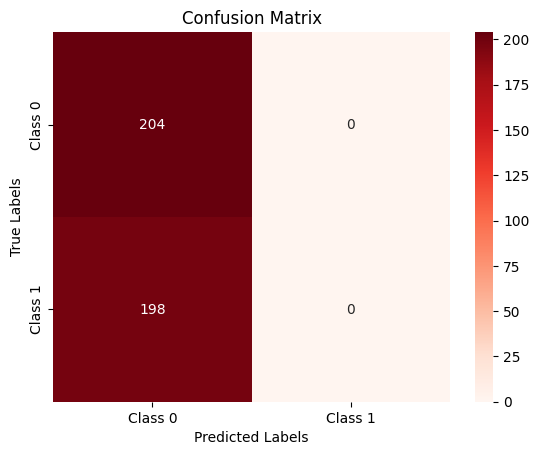

In [104]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix with a heatmap for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Conclusions and Limitations

- The overall data is not informative enough to detect the accurate rate of terror.
- The model, therefore, does not represent a suficent overview of the actual terror rate, because of poor data.
- Even with readjustment of parameters, e.g., creating a new neural network, readjust number of neurons, adding addtional hidden layers, increasing number of epochs and batch size, accuracy still remained poor and the latter metrics also depict that the model does not detect patterns as accurately as it would if the data was more informative

# Room for Data Improvement 

- Stating religious background
- People's behavioral backgorund (e.g., agressiveness)
- Check searched internet history and detect patterns
- Partition in certain suspecful organizations